<a href="https://colab.research.google.com/github/filladani/PCVK_2024/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Tugas No 1

Gamma Correction pada citra
-----------------------------
Masukkan nilai gamma: 3


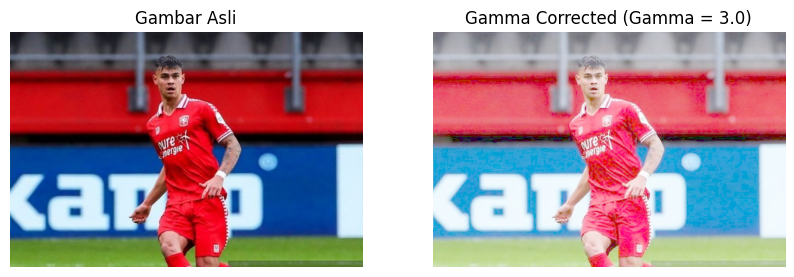

In [3]:
# Baca gambar dari Google Drive
image_path = '/content/drive/MyDrive/PCVK/images/mees.jpg'  # Ganti sesuai path gambar
image = cv.imread(image_path)

# Fungsi untuk koreksi gamma
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

# Koreksi gamma pada gambar
print('Gamma Correction pada citra')
print('-----------------------------')
try:
    gamma = float(input('Masukkan nilai gamma: '))
    adjusted_image = adjust_gamma(image, gamma)

    # Tampilkan gambar asli dan hasil koreksi gamma
    plt.figure(figsize=(10, 5))

    # Gambar Asli
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')

    # Gambar Hasil Koreksi Gamma
    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(adjusted_image, cv.COLOR_BGR2RGB))
    plt.title(f'Gamma Corrected (Gamma = {gamma})')
    plt.axis('off')

    plt.show()

except ValueError:
    print('Error, nilai yang dimasukkan bukan angka')


Tugas No 2

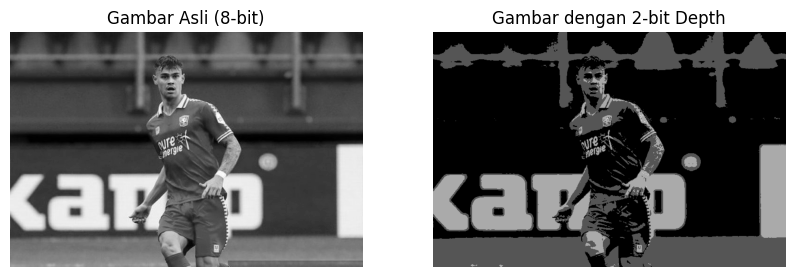

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Parameter bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca gambar grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/images/mees.jpg', cv.IMREAD_GRAYSCALE)

# Mengecek apakah gambar berhasil dimuat
if original is None:
    print("Gambar tidak ditemukan atau tidak dapat dibuka.")
else:
    # Menginisialisasi depth_image sesuai dengan ukuran dan tipe data gambar asli
    depth_image = np.zeros(original.shape, original.dtype)

    # Mengonversi gambar ke kedalaman bit yang lebih rendah
    depth_image = (original / level).astype(np.uint8) * level

    # Menampilkan gambar asli dan gambar hasil perubahan bit depth
    plt.figure(figsize=(10, 5))

    # Gambar Asli
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Gambar Asli (8-bit)')
    plt.axis('off')

    # Gambar dengan bit depth yang diubah
    plt.subplot(1, 2, 2)
    plt.imshow(depth_image, cmap='gray')
    plt.title(f'Gambar dengan {bit_depth}-bit Depth')
    plt.axis('off')

    plt.show()


Tugas no 3

Nilai PSNR adalah 19.522079269752922 (dB)
Jumlah Citra : 5


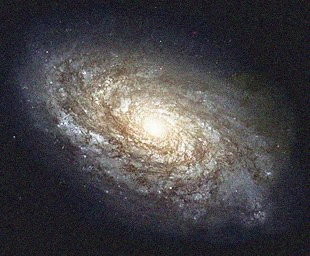

Nilai PSNR adalah 19.730314858642572 (dB)
Jumlah Citra : 10


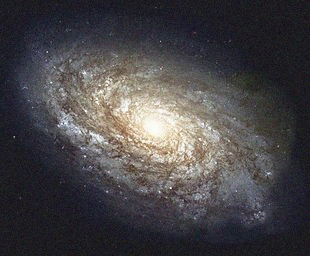

Nilai PSNR adalah 19.8361339344107 (dB)
Jumlah Citra : 20


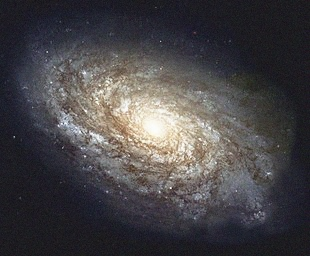

Nilai PSNR adalah 19.891259847352366 (dB)
Jumlah Citra : 40


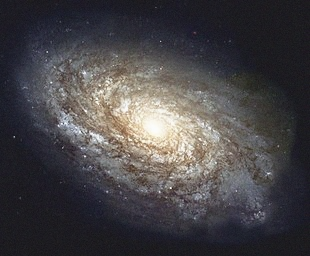

Nilai PSNR adalah 19.919207496184978 (dB)
Jumlah Citra : 80


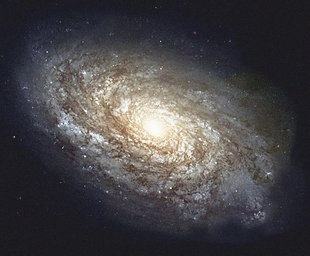

Nilai PSNR adalah 19.92196095594035 (dB)
Jumlah Citra : 100


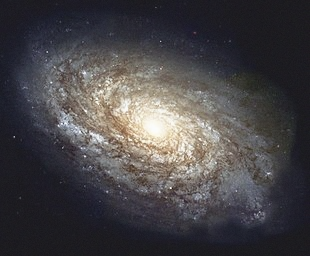

In [5]:
import cv2
import numpy as np
from math import log10, sqrt
import glob

def PSNR(original, img2):
    mse = np.mean((original - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/images/noises-20240929T145234Z-001/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

def denoise_image(n):
  denoised_image = np.zeros(cv_img[0].shape)
  for i in range(n):
    denoised_image = denoised_image+cv_img[i]

  denoised_image = np.uint16(denoised_image/n)
  psnr= PSNR(original, denoised_image)
  print('Nilai PSNR adalah', psnr, '(dB)')
  print('Jumlah Citra :', n)
  cv2_imshow(denoised_image)

jumlah = [5,10,20,40,80,100]
for i in jumlah:
  denoise_image(i)

Kesimpulan yang diambil adalah Semakin banyak jumlah citra, maka nilai PNSR semakin bertambah.

Tugas no 4

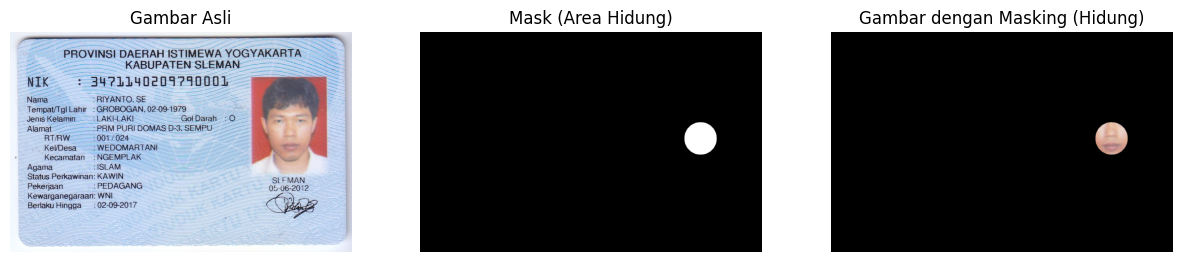

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar KTP
image = cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.png')

# Koordinat perkiraan hidung
hidung_center = (865, 330)  # Koordinat x, y bagian hidung
hidung_radius = 50         # Radius lingkaran

# Membuat mask dengan ukuran yang sama seperti gambar asli, dengan nilai 0 (hitam)
mask = np.zeros(image.shape[:2], dtype="uint8")

# Membuat lingkaran putih di mask (posisi hidung, radius, warna putih, dan ketebalan penuh)
cv2.circle(mask, hidung_center, hidung_radius, 255, -1)

# Terapkan mask ke gambar dengan bitwise AND
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Menampilkan gambar asli, mask, dan hasil masked image
plt.figure(figsize=(15, 5))

# Gambar Asli
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

# Mask (Biner)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask (Area Hidung)')
plt.axis('off')

# Gambar dengan Masking (Area Hidung)
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Gambar dengan Masking (Hidung)')
plt.axis('off')

plt.show()

Tugas no 5

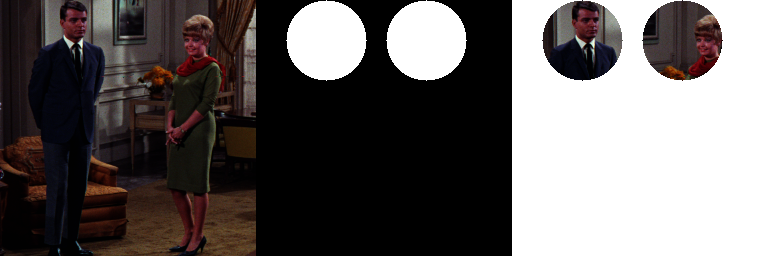

In [28]:
img = cv.imread('/content/drive/MyDrive/PCVK/images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (170, 40), 40, (255,255,255), -1)

result = img & mask & mask2
#fungsi dari opencv berikut dapat digunakan
#result = cv.bitwise_and(image, mask)
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

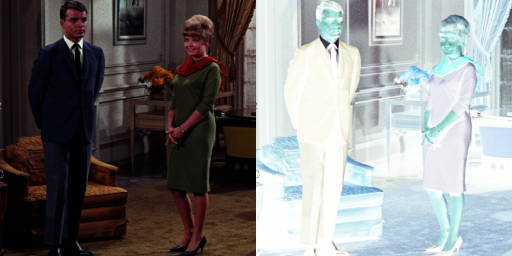

In [29]:
# NOT
result = cv.bitwise_not(img, result)

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

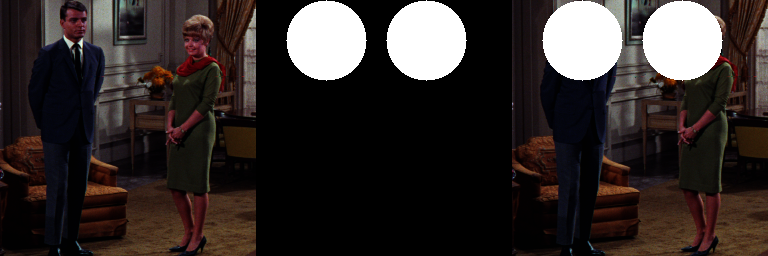

In [30]:
# OR
result = img | mask | mask2

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

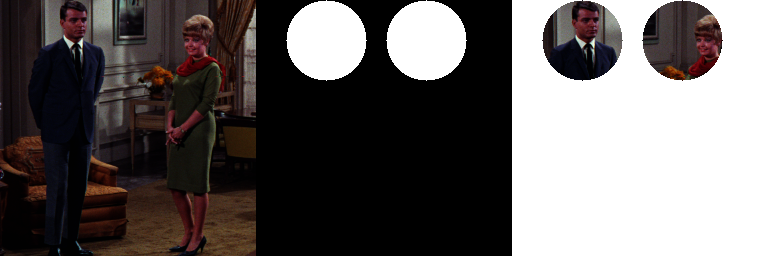

In [31]:
# AND
result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

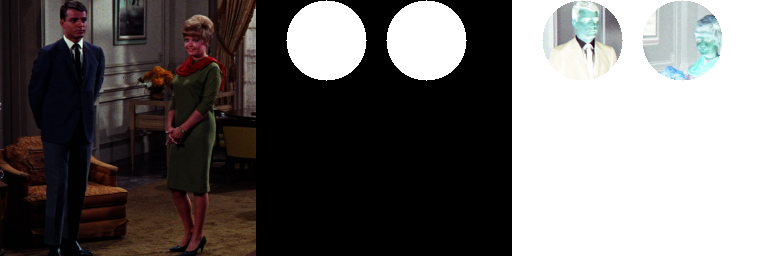

In [32]:
# NAND
result = cv.bitwise_not(cv.bitwise_and(img, mask))

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

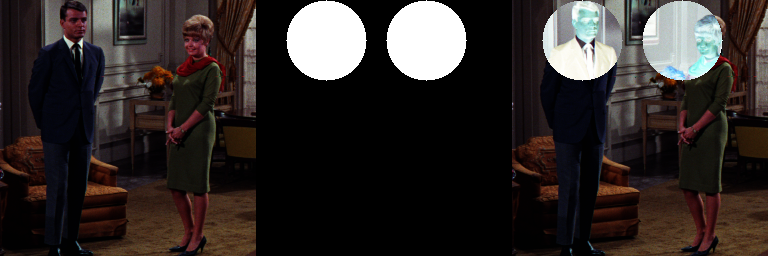

In [33]:
# XOR
result = cv.bitwise_xor(img, mask, result)

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

 Hasil Analisa :
- Pada Operasi NOT menampilkan gambar menjadi negatif.
- Pada Operasi OR menampilkan gambar asli tetap dan mask menjadi putih.
- Pada Operasi AND menampilkan gambar asli menjadi putih tetapi mask nya normal.
- Pada Operasi NAND menampilkan gambar asli menjadi warna putih dan mask menjadi negatif.
- Pada Operasi XOR menampilkan gambar asli tetap tetapi mask menjadi negatif.